**GENERISANI OTPAD EDA ANALIZA**

Podaci preuzeti sa data.org.rs

**Izvor podataka:** Agencija za za≈°titu ≈æivotne sredine

Agencija za za≈°titu ≈æivotne sredine, kao organ u sastavu Ministarstva za≈°tite ≈æivotne sredine, sa svojstvom pravnog lica, obavlja struƒçne poslove koji se odnose na: razvoj, usklaƒëivanje i voƒëenje nacionalnog informacionog sistema za≈°tite ≈æivotne sredine (praƒáenje stanja ƒçinilaca ≈æivotne sredine kroz‚Ä¶

**Link prema skupu podataka**:https://data.gov.rs/sr/datasets/generisan-otpad-1/#community-resources

**Permalink**: https://data.gov.rs/sr/datasets/generisan-otpad-1/

**Datum preuzimanja**: 05.05.2025 godine

# Opis

Ovaj set podataka sadr≈æi informacije o generisanom otpadu u Republici Srbiji, prikupljene iz Nacionalnog registra izvora zagaƒëivanja. Podaci se odnose na razliƒçite privredne subjekte, uz detalje o vrsti i koliƒçini otpada.

Atributi seta podataka
Godina ‚Äì Godina za koju se podaci odnose
Okrug ‚Äì Naziv okruga u kojem se nalazi izvor zagaƒëenja
Region ‚Äì Naziv regiona u kojem se nalazi izvor zagaƒëenja
Op≈°tina ‚Äì Naziv op≈°tine u kojoj se nalazi izvor zagaƒëenja
Mesto ‚Äì Naziv mesta u kojem se nalazi izvor zagaƒëenja
≈†ifraMesta ‚Äì Jedinstvena ≈°ifra mesta u skladu sa zvaniƒçnim kodiranjem
Prete≈æna delatnost ‚Äì Osnovna delatnost preduzeƒáa koje generi≈°e otpad
PIB ‚Äì Poreski identifikacioni broj preduzeƒáa
Preduzeƒáe ‚Äì Naziv preduzeƒáa koje generi≈°e otpad
Nacionalni ID ‚Äì Jedinstveni identifikator preduzeƒáa u Nacionalnom registru izvora zagaƒëenja
Postrojenje ‚Äì Naziv postrojenja koje generi≈°e otpad
PRTR kod ‚Äì Kod u skladu sa Protokolom o registrima ispu≈°tanja i prenosa zagaƒëivaƒça (PRTR)
Indeksni broj ‚Äì Indeksni broj otpada prema zvaniƒçnoj kategorizaciji
Opis otpada ‚Äì Detaljan opis vrste otpada koji se generi≈°e
Koliƒçina otpada ‚Äì Koliƒçina otpada (izra≈æena u tonama)

Ovi podaci omoguƒáavaju praƒáenje generisanog otpada po geografskim i industrijskim kriterijumima, ≈°to doprinosi boljem upravljanju otpadom i za≈°titi ≈æivotne sredine.

In [1]:
# Uƒçitavanje biblioteka potrebnih za EDA analizu
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Setup Complete!")

Setup Complete!


In [2]:
# Uƒçitavanje skupa podataka
df = pd.read_excel("generisani_otpad.xlsx", engine="openpyxl")

In [3]:
# Osnovi pregled skupa podataka

In [3]:
# Kakav je oklik skupa podataka
print(f"Ukupan broj kolona u skupu je:",df.shape[0])
print(f"Ukupan broj kolona u skupu je:", df.shape[1])

Ukupan broj kolona u skupu je: 20210
Ukupan broj kolona u skupu je: 15


In [4]:
# Prikaz informacija o samom skupu podataka
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20210 entries, 0 to 20209
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Godina             20210 non-null  int64  
 1   Okrug              20210 non-null  object 
 2   Region             20210 non-null  object 
 3   Opstina            20210 non-null  object 
 4   Mesto              20210 non-null  object 
 5   SifraMesta         20210 non-null  int64  
 6   PreteznaDelatnost  20206 non-null  object 
 7   PIB                20210 non-null  int64  
 8   Preduzece          20210 non-null  object 
 9   NacionalniId       20210 non-null  object 
 10  Postrojenje        20210 non-null  object 
 11  PRTRKod            20107 non-null  object 
 12  IndeksniBroj       20210 non-null  object 
 13  OpisOtpada         20210 non-null  object 
 14  KolicinaOtpadaT    20210 non-null  float64
dtypes: float64(1), int64(3), object(11)
memory usage: 2.3+ MB


**Komentar:** Iz osnovnih informacija o skupu mo≈æemom videti da ima 15 kolona, 20210 redova, 11 kolona sa object dtype i 4 koje imaju numeric dtype (numeriƒçkim tipom podataka).
Skup je objedinjen i sadr≈æi sve podatke za period 2023-2010 godina.

In [5]:
# Da li ima podataka po kolonama koji nedostaju?
df.isnull().sum()

Godina                 0
Okrug                  0
Region                 0
Opstina                0
Mesto                  0
SifraMesta             0
PreteznaDelatnost      4
PIB                    0
Preduzece              0
NacionalniId           0
Postrojenje            0
PRTRKod              103
IndeksniBroj           0
OpisOtpada             0
KolicinaOtpadaT        0
dtype: int64

**Komentar:** Ovde vidimo da za 4 reda nedostaje podatak u koloni PreteznaDelatnost kao i za 103 reda nedostaje podatak u koloni PRTRKod

In [6]:
# Grafiƒçko prikazivanje kolona kod kojih nedostaju podaci prikazani putem heatmap-e.
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull())
plt.show()

In [7]:
# Konverzija svih kolona koje su sa object dtype u mala slova
df = df.apply(lambda col: col.str.lower() if col.dtype == "object" else col)

In [8]:
# Prikaz prvih nekoliko redova nakon transformacije
print(df.head(3))

   Godina         Okrug                         Region Opstina Mesto  \
0    2023  borski okrug  region ju≈æne i istoƒçne srbije     bor   bor   
1    2023  borski okrug  region ju≈æne i istoƒçne srbije     bor   bor   
2    2023  borski okrug  region ju≈æne i istoƒçne srbije     bor   bor   

   SifraMesta                                  PreteznaDelatnost        PIB  \
0      706418  0729 eksploatacija ruda ostalih crnih, obojeni...  100570195   
1      706418  0729 eksploatacija ruda ostalih crnih, obojeni...  100570195   
2      706418  0729 eksploatacija ruda ostalih crnih, obojeni...  100570195   

                     Preduzece NacionalniId  \
0  serbia zijin copper doo bor  100570195/2   
1  serbia zijin copper doo bor  100570195/4   
2  serbia zijin copper doo bor  100570195/4   

                                        Postrojenje     PRTRKod IndeksniBroj  \
0  ogranak rbb bor - rudnici bakra bor doo, kreƒçana  3.(c).(ii)    15 01 10*   
1   ogranak rbb bor - povr≈°inski kop 

In [9]:
# Konverzija iz int64 u object (tj. string)
df[["Godina", "SifraMesta", "PIB"]] = df[["Godina", "SifraMesta", "PIB"]].astype(str)

# Provera tipova podataka nakon konverzije
print(df.dtypes)

Godina                object
Okrug                 object
Region                object
Opstina               object
Mesto                 object
SifraMesta            object
PreteznaDelatnost     object
PIB                   object
Preduzece             object
NacionalniId          object
Postrojenje           object
PRTRKod               object
IndeksniBroj          object
OpisOtpada            object
KolicinaOtpadaT      float64
dtype: object


In [10]:
# Prikaz broja duplikata u DataFrame-u
print(f"Broj dupliranih redova: {df.duplicated().sum()}")

Broj dupliranih redova: 0


In [11]:
# Prikaz osnovne statistike za numeriƒçke kolone
print(df.describe())

       KolicinaOtpadaT
count     2.021000e+04
mean      5.061817e+03
std       9.081651e+04
min       0.000000e+00
25%       3.800000e-01
50%       3.000000e+00
75%       3.000000e+01
max       4.000000e+06


**Komentar:**Statistika pokazuje da postoji velika varijacija u vrednostima KolicinaOtpadaT ‚Äì standardna devijacija (std = 90,816.51) je dosta visoka u odnosu na prosek (mean = 5,061.82), ≈°to ukazuje na ≈°irok raspon podataka.

# Evo nekih kljuƒçnih zapa≈æanja:

Minimalna vrednost = 0, ≈°to znaƒçi da postoje unosi bez generisanog otpada. Maksimalna vrednost = 4,000,000, ≈°to pokazuje da neki zapisi imaju izuzetno visoke vrednosti.
Medijana (50%) = 3, dok je prosek znatno veƒái ‚Äì ovo ukazuje da dataset verovatno ima outliere (ekstremne vrednosti). 25% kvartil = 0.38, 75% kvartil = 30, ≈°to znaƒçi da veƒáina vrednosti otpada ostaje relativno niska, ali postoji mali broj zapisa sa izuzetno visokim koliƒçinama otpada.

In [13]:
# Vizualizuje≈° raspodelu podataka (histogram)

plt.figure(figsize=(12, 3))
sns.histplot(df["KolicinaOtpadaT"], bins=50, kde=True)
plt.title("Distribucija KolicinaOtpadaT")
plt.xlabel("Kolicina otpada (T)")
plt.ylabel("Broj unosa")

# ƒåuvanje slike
plt.savefig("histogram_kolicina_otpada.png", dpi=100, bbox_inches="tight")
plt.show()

**Komentar:** Histogram prikazuje raspodelu koliƒçine otpada u datasetu. Veƒáina unosa je koncentrisana blizu nule, dok mali broj vrednosti ide sve do 4 miliona tona, ≈°to potvrƒëuje postojanje ekstremnih vrednosti (outliera)

In [14]:
# Boxplot za identifikaciju outliera
plt.figure(figsize=(12, 3))
sns.boxplot(x=df["KolicinaOtpadaT"])
plt.title("Boxplot KolicinaOtpadaT")

# ƒåuvanje slike
plt.savefig("boxplot_kolicina_otpada.png", dpi=100, bbox_inches="tight")
plt.show()

**Komentar:**
Boxplot jasno prikazuje da je raspodela koliƒçine otpada vrlo asimetriƒçna, sa velikim brojem outliera (ekstremnih vrednosti). üîç

## Kljuƒçna zapa≈æanja:
Veliki broj vrednosti koncentrisanih na donjem delu ‚Äì veƒáina podataka se nalazi u relativno malom rasponu. Postojanje ekstremno visokih vrednosti ‚Äì nekoliko podataka se znatno razlikuje od ostatka dataset-a. Skewed distribucija ‚Äì kutija (IQR) je blizu donjeg dela raspona, dok se outlieri prote≈æu daleko.

In [15]:
# Transformacija podataka (log-transformacija mo≈æe pomoƒái):
df["KolicinaOtpadaT_log"] = np.log1p(df["KolicinaOtpadaT"])

In [16]:
# Kako sada izgleda distribucija nakon log-transformacije:

plt.figure(figsize=(12, 4))
sns.histplot(df["KolicinaOtpadaT_log"], bins=50, kde=True)
plt.title("Distribucija (log-transformed) KolicinaOtpadaT")
plt.xlabel("Log-transformed Kolicina otpada (T)")
plt.ylabel("Broj unosa")

# ƒåuvanje slike
plt.savefig("histogram_log_kolicina_otpada.png", dpi=100, bbox_inches="tight")
plt.show()

**Komentar:** Histogram prikazuje distribuciju log-transformisane koliƒçine otpada. Veƒáina podataka je sada ravnomernije rasporeƒëena, ali jo≈° uvek postoji skewed distribucija, ≈°to mo≈æe znaƒçiti da i dalje postoje ekstremne vrednosti.

In [17]:
# Vizualizacija outliera nakon log-transformacije
# Ovaj boxplot treba da prika≈æe da li su ekstremne vrednosti i dalje prisutne:
plt.figure(figsize=(12, 4))
sns.boxplot(x=df["KolicinaOtpadaT_log"])
plt.title("Boxplot (log-transformed) KolicinaOtpadaT")

# ƒåuvanje slike
plt.savefig("boxplot_log_kolicina_otpada.png", dpi=100, bbox_inches="tight")
plt.show()

**Komentar:** Boxplot za log-transformisanu koliƒçinu otpada pokazuje da se podaci sada mnogo ravnomernije distribuiraju, ali jo≈° uvek postoji dug rep outliera.

# Kljuƒçna zapa≈æanja: 
Veƒáina podataka je koncentrisana izmeƒëu 0 i 4 na log-skali. Postoji nekoliko ekstremnih vrednosti koje se prote≈æu do oko 14 na skali. Log-transformacija je pomogla, ali mo≈æda jo≈° uvek treba dodatno filtrirati outliere.

In [18]:
# Raƒçunamo broj outliera i njihov procenat u dataset-u pomoƒáu ovog koda:
Q1 = df["KolicinaOtpadaT_log"].quantile(0.25)
Q3 = df["KolicinaOtpadaT_log"].quantile(0.75)
IQR = Q3 - Q1

donja_granica = Q1 - 1.5 * IQR
gornja_granica = Q3 + 1.5 * IQR

# Filtriranje outliera
outlieri = df[(df["KolicinaOtpadaT_log"] < donja_granica) | (df["KolicinaOtpadaT_log"] > gornja_granica)]

# Broj i procenat outliera
broj_outliera = len(outlieri)
procenat_outliera = (broj_outliera / len(df)) * 100

print(f"Broj outliera: {broj_outliera}")
print(f"Procenat outliera u dataset-u: {procenat_outliera:.2f}%")

Broj outliera: 512
Procenat outliera u dataset-u: 2.53%


**Komentar:** Po≈°to je % outlier-a mali mo≈æe se odluƒçiti da li ih zadr≈æati ili odbaciti. Uzimajuƒái u obzir da imamo malo podataka o ekstremnim vrednsotima ,a koji mogu biti znaƒçajni za analizu ove vrednosti ƒáe biti zadr≈æane.

In [19]:
# Pregled najekstremnijih outliera - top 10 najveƒáih vrednosti:
print(outlieri.nlargest(10, "KolicinaOtpadaT"))

      Godina                Okrug             Region            Opstina  \
17351   2013  ju√•¬æno-ba√§¬çki okrug   region vojvodine            temerin   
5481    2020         grad beograd  beogradski region  beograd-obrenovac   
3933    2021         grad beograd  beogradski region  beograd-obrenovac   
8056    2019         grad beograd  beogradski region  beograd-obrenovac   
9000    2018         grad beograd  beogradski region  beograd-obrenovac   
11915   2017         grad beograd  beogradski region  beograd-obrenovac   
5970    2020         grad beograd  beogradski region  beograd-obrenovac   
7292    2019         grad beograd  beogradski region  beograd-obrenovac   
9076    2018         grad beograd  beogradski region  beograd-obrenovac   
2336    2022         grad beograd  beogradski region  beograd-obrenovac   

           Mesto SifraMesta  \
17351    temerin     804681   
5481   obrenovac     704741   
3933   obrenovac     704741   
8056   obrenovac     704741   
9000   obrenova

In [20]:
# Analiza distribucije po kategorijama: Da li odreƒëene godine ili mesta imaju vi≈°e outliera?
print(outlieri["Godina"].value_counts())  # Po godinama
print(outlieri["Mesto"].value_counts())  # Po mestima

Godina
2019    47
2022    43
2016    42
2013    41
2011    41
2014    40
2015    40
2012    40
2018    40
2020    36
2017    36
2023    34
2021    32
Name: count, dtype: int64
Mesto
kragujevac    30
radinac       30
smederevo     23
obrenovac     23
vreoci        20
              ..
bancarevo      1
uzovnica       1
leskovac       1
kaleni√§‚Ä°       1
√•¬†tavalj       1
Name: count, Length: 70, dtype: int64


In [21]:
# Vizualizacija odnosa izmeƒëu varijabli Mo≈æemo pogledati da li ekstremne vrednosti imaju zajedniƒçke karakteristike.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x="Godina", y="KolicinaOtpadaT", data=df, alpha=0.5)
sns.scatterplot(x="Godina", y="KolicinaOtpadaT", data=outlieri, color="red")
plt.title("Vizualizacija outliera u odnosu na Godinu")

# ƒåuvanje slike
plt.savefig("vizuelizacija_outlier_po_godinama.png", dpi=100, bbox_inches="tight")
plt.show()

**Potvrda zapa≈æanja:**

Top 10 outlier vrednosti: Dominira Javno preduzeƒáe Elektroprivreda Srbije, sa postrojenjima TENT A i TENT B, i koliƒçinama otpada u rasponu od 14,7 do 15,2 miliona tona.Godine sa najveƒáim brojem outliera: 2019 (47), 2022 (43), 2016 (42) itd.Mesta sa najveƒáim brojem outliera: Kragujevac (30), Radinac (30), Smederevo (23) itd.
Scatterplot pokazuje najveƒáu koliƒçinu otpada u 2013, zatim slede 2020, 2019 i 2021.

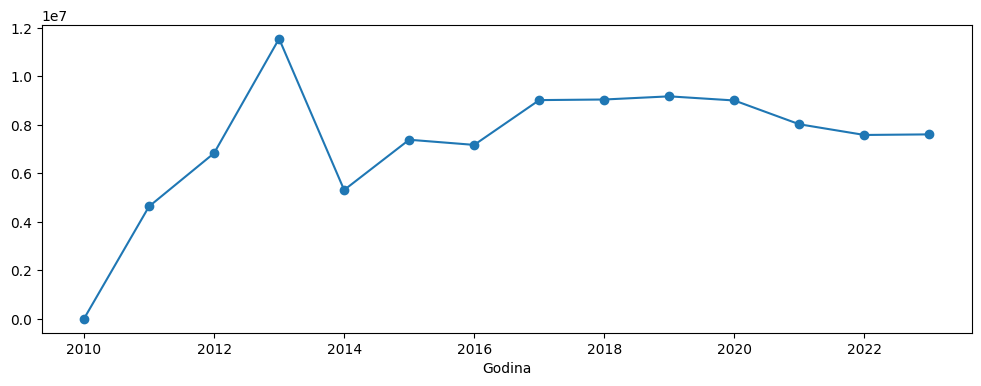

In [22]:
# Trend analizu ‚Äì Kako se koliƒçina otpada menjala kroz godine?
plt.figure(figsize=(12,4))
df.groupby("Godina")["KolicinaOtpadaT"].sum().plot(kind="line", marker="o")

# ƒåuvanje slike
plt.savefig("koliƒçina_otpada_kroz_godine.png", dpi=100, bbox_inches="tight")
plt.show()

**Kljuƒçna zapa≈æanja iz vizualizacije:**

2013 i 2017 su imale znaƒçajne skokove otpada, ≈°to mo≈æe ukazivati na veƒáe industrijske aktivnosti ili promene u regulaciji.Posle 2020 dolazi do pada koliƒçine otpada, ≈°to mo≈æe biti rezultat novih ekolo≈°kih politika ili smanjenja industrijske proizvodnje. Najveƒáa koliƒçina otpada generisana je u 2013, ≈°to se poklapa sa prethodnim zapa≈æanjima iz outlier analize.

In [23]:
# prika≈æi sve kolone
df.columns

Index(['Godina', 'Okrug', 'Region', 'Opstina', 'Mesto', 'SifraMesta',
       'PreteznaDelatnost', 'PIB', 'Preduzece', 'NacionalniId', 'Postrojenje',
       'PRTRKod', 'IndeksniBroj', 'OpisOtpada', 'KolicinaOtpadaT',
       'KolicinaOtpadaT_log'],
      dtype='object')

In [24]:
# korekcija naziva regiona i ispravljanje ƒáiriliƒçnih slova
df["Region"]=df["Region"].replace({
    "region √•\xa0umadije i zapadne srbije":"region ≈°umadije i zapadne srbije",
    "region ju√•¬æne i isto√§\x8dne srbije":"region ju≈æne i istoƒçne srbije"

})

In [25]:
df["Region"].unique()

array(['region ju≈æne i istoƒçne srbije', 'beogradski region',
       'region vojvodine', 'region ≈°umadije i zapadne srbije'],
      dtype=object)

In [26]:
# Grupna analiza po kategorijama ‚Äì Kako se koliƒçina otpada razlikuje po regionima, delatnostima, godinama?
df.groupby("Region")["KolicinaOtpadaT"].sum().sort_values(ascending=False)

Region
beogradski region                   5.742943e+07
region ju≈æne i istoƒçne srbije       3.522806e+07
region vojvodine                    6.714475e+06
region ≈°umadije i zapadne srbije    2.927364e+06
Name: KolicinaOtpadaT, dtype: float64

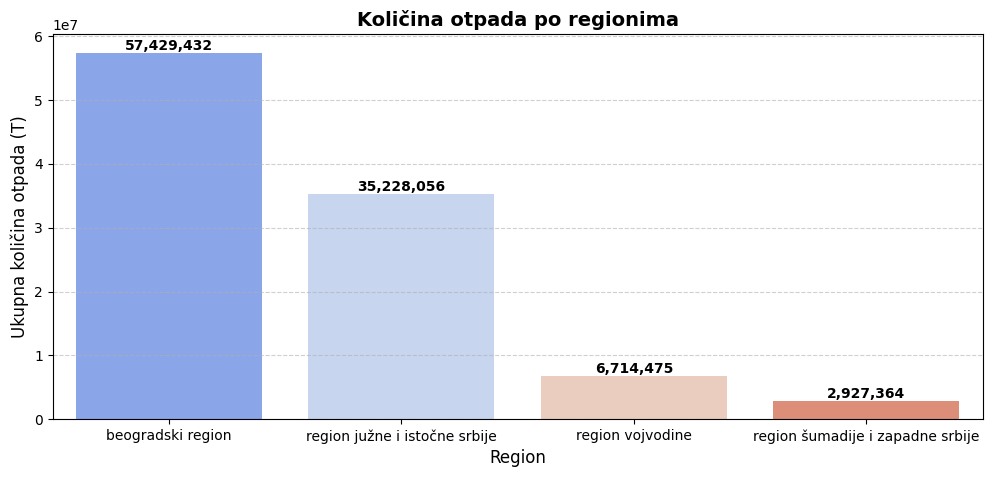

In [27]:
# Priprema podataka
region_data = df.groupby("Region")["KolicinaOtpadaT"].sum().sort_values(ascending=False)

# Postavljanje coolwarm palete
colors = sns.color_palette("coolwarm", len(region_data))

plt.figure(figsize=(12, 5))
ax = sns.barplot(x=region_data.index, y=region_data.values,hue=region_data.index, palette=colors, legend=False)

# Dodavanje anotacija na svaki bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Pode≈°avanje izgleda
plt.xticks(rotation=0)  # X osa horizontalno
plt.title("Koliƒçina otpada po regionima", fontsize=14, fontweight="bold")
plt.xlabel("Region", fontsize=12)
plt.ylabel("Ukupna koliƒçina otpada (T)", fontsize=12)
plt.grid(axis='y', linestyle="--", alpha=0.6)

# ƒåuvanje slike
plt.savefig("region_otpad_enhanced.png", dpi=100, bbox_inches="tight")
plt.show()

In [28]:
df["Opstina"]=df["Opstina"].replace({"medve√§‚Äòa":"medveƒëa"})

In [29]:
df.groupby("Opstina")["KolicinaOtpadaT"].sum().sort_values(ascending=False).head(10)

Opstina
beograd-obrenovac    5.325148e+07
kostolac             2.274752e+07
smederevo            8.384954e+06
temerin              4.044351e+06
beograd-lazarevac    3.678583e+06
vranjska banja       1.738250e+06
svilajnac            1.518251e+06
sokobanja            8.774281e+05
medveƒëa              5.502559e+05
kragujevac - grad    5.018878e+05
Name: KolicinaOtpadaT, dtype: float64

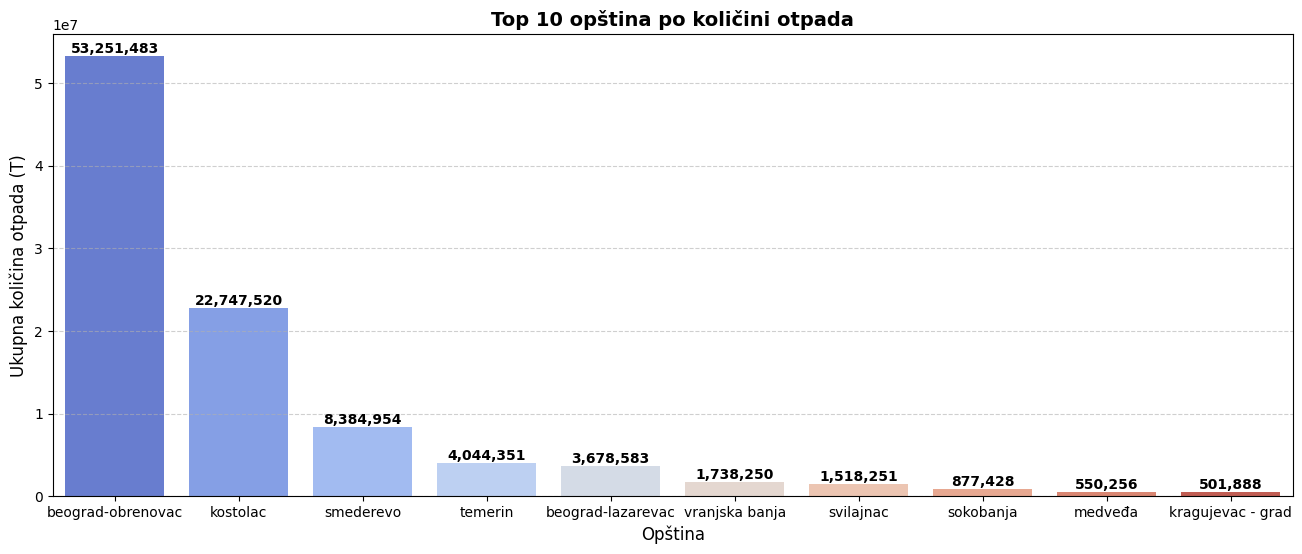

In [30]:
# Priprema podataka
opstine_data = df.groupby("Opstina")["KolicinaOtpadaT"].sum().sort_values(ascending=False).head(10)
colors = sns.color_palette("coolwarm", len(opstine_data))

plt.figure(figsize=(16, 6))
ax = sns.barplot(x=opstine_data.index, y=opstine_data.values, hue=opstine_data.index, palette=colors, legend=False)

# Dodavanje anotacija
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.xticks(rotation=0)
plt.title("Top 10 op≈°tina po koliƒçini otpada", fontsize=14, fontweight="bold")
plt.xlabel("Op≈°tina", fontsize=12)
plt.ylabel("Ukupna koliƒçina otpada (T)", fontsize=12)
plt.grid(axis='y', linestyle="--", alpha=0.6)

plt.savefig("opstine_otpad_enhanced.png", dpi=100, bbox_inches="tight")
plt.show()

In [31]:
# korekcija naziva op≈°tina i ispravljanje ƒáiriliƒçnih slova
df["PreteznaDelatnost"] = df["PreteznaDelatnost"].replace({
    "3514 trgovina elektri√§¬çnom energijom": "3514 trgovina elektriƒçnom energijom",
    "3511 proizvodnja elektri√§¬çne energije": "3511 proizvodnja elektriƒçne energije",
    "2410 proizvodnja sirovog gvo√•¬æ√§‚Äòa, √§¬çelika i ferolegura": "2410 proizvodnja sirovog gvo≈æƒëa, ƒçelika i ferolegura",
    "0111 gajenje √•¬æita (osim pirin√§¬ça), leguminoza i uljarica": "0111 gajenje ≈æita (osim pirinƒça), leguminoza i uljarica"
})

In [33]:
# Top 5 delatnosti po generisanom otpadu
delatnost_data=df.groupby("PreteznaDelatnost")["KolicinaOtpadaT"].sum().sort_values(ascending=False).head(5)
delatnost_data

PreteznaDelatnost
3514 trgovina elektriƒçnom energijom                                            6.212549e+07
3511 proizvodnja elektriƒçne energije                                           1.876272e+07
2410 proizvodnja sirovog gvo≈æƒëa, ƒçelika i ferolegura                           8.834012e+06
0111 gajenje ≈æita (osim pirinƒça), leguminoza i uljarica                        4.537666e+06
0729 eksploatacija ruda ostalih crnih, obojenih, plemenitih i drugih metala    2.428312e+06
Name: KolicinaOtpadaT, dtype: float64

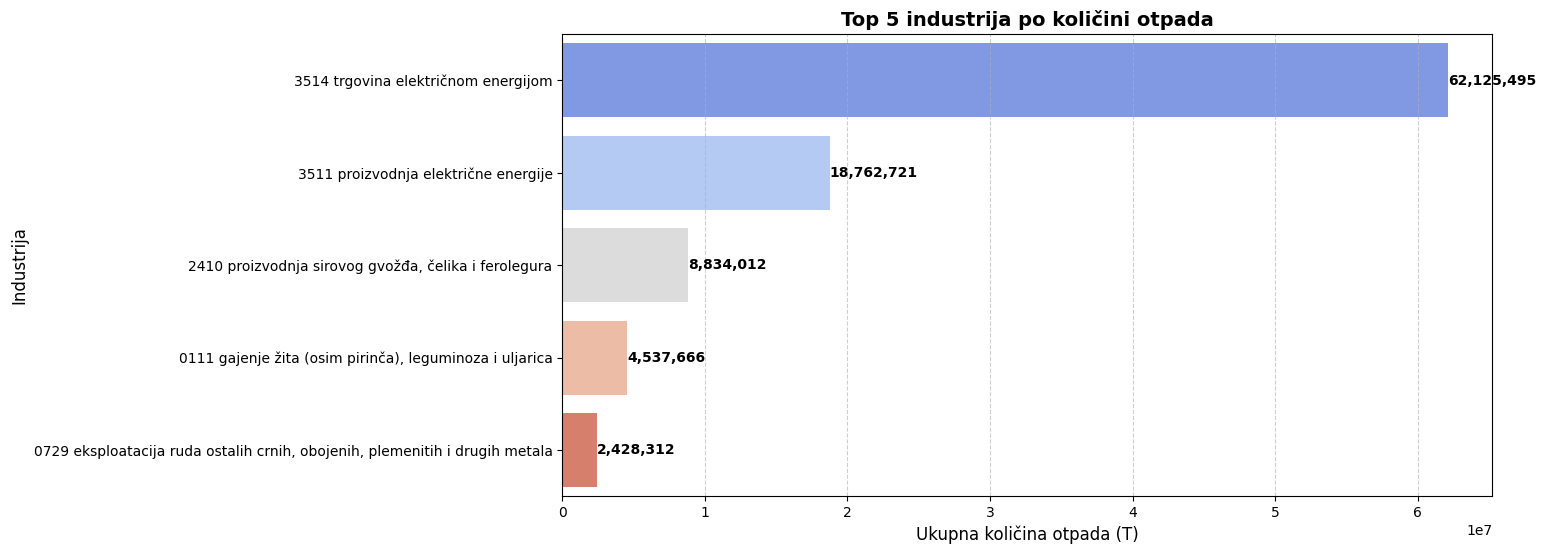

In [34]:
# Priprema podataka
plt.figure(figsize=(12, 6))
ax = sns.barplot(y=delatnost_data.index, x=delatnost_data.values,hue=delatnost_data.index, palette="coolwarm", legend=False)

# Dodavanje anotacija
for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', fontsize=10, fontweight='bold', color='black')

# Pode≈°avanje izgleda
plt.title("Top 5 industrija po koliƒçini otpada", fontsize=14, fontweight="bold")
plt.xlabel("Ukupna koliƒçina otpada (T)", fontsize=12)
plt.ylabel("Industrija", fontsize=12)
plt.grid(axis='x', linestyle="--", alpha=0.6)

plt.savefig("industrije_otpad_horizontal.png", dpi=100, bbox_inches="tight")
plt.show()

In [35]:
#Korekcija opisa otpada sa promenom ƒáiriliƒçnih slova
df["OpisOtpada"] = df["OpisOtpada"].replace({
    "lete√§‚Ä°i pepeo od uglja": "leteƒái pepeo od uglja",
    "otpadi od prerade √•¬°ljake":"otpadi od prerade ≈°ljake",
    "otpadi iz fizi√§¬çke i hemijske obrade minerala za obojenu metalurgiju koji sadr√•¬æe opasne supstance":"otpadi iz fiziƒçke i hemijske obrade minerala za obojenu metalurgiju koji sadr≈æe opasne supstance",
    "jalovine druga√§¬çije od onih navedenih u 01 03 04 i 01 03 05":"jalovine drugaƒçije od onih navedenih u 01 03 04 i 01 03 05",
    "pepeo, √•¬°ljaka i pra√•¬°ina iz kotla (izuzev pra√•¬°ine iz kotla navedene u 10 01 04)":"pepeo, ≈°ljaka i pra≈°ina iz kotla (izuzev pra≈°ine iz kotla navedene u 10 01 04)",
    "solidifikovani otpadi druga√§¬çiji od onih navedenih u 19 03 06":"solidifikovani otpadi drugaƒçiji od onih navedenih u 19 03 06",
    "gvo√•¬æ√§‚Äòe i √§¬çelik":"gvo≈æƒëe i ƒçelik",
    "√•¬æivotinjski feces, urin i √§‚Äòubrivo (uklju√§¬çuju√§‚Ä°i i otpadnu slamu), te√§¬çni otpad, sakupljen odvojeno i tretiran van mesta nastajanja":"≈æivotinjski feces, urin i ƒëubrivo (ukljuƒçujuƒái i otpadnu slamu), teƒçni otpad, sakupljen odvojeno i tretiran van mesta nastajanja",
    "neprera√§‚Äòena ≈°ljaka":"nepreraƒëena ≈°ljaka",
    "otpadi koji nisu druga√§¬çije specificirani":"otpadi koji nisu drugaƒçije specificirani"        
})

In [36]:
# Top 10 opisa otpda po generisanom otpadu
otpadi_data=df.groupby("OpisOtpada")["KolicinaOtpadaT"].sum().sort_values(ascending=False).head(10)
otpadi_data

OpisOtpada
leteƒái pepeo od uglja                                                                                                               7.720629e+07
≈æivotinjski feces, urin i ƒëubrivo (ukljuƒçujuƒái i otpadnu slamu), teƒçni otpad, sakupljen odvojeno i tretiran van mesta nastajanja    4.887704e+06
otpadi od prerade ≈°ljake                                                                                                            3.679848e+06
pepeo, ≈°ljaka i pra≈°ina iz kotla (izuzev pra≈°ine iz kotla navedene u 10 01 04)                                                      3.458978e+06
solidifikovani otpadi drugaƒçiji od onih navedenih u 19 03 06                                                                        2.176337e+06
otpadi iz fiziƒçke i hemijske obrade minerala za obojenu metalurgiju koji sadr≈æe opasne supstance                                    1.779022e+06
neprera√§‚Äòena √•¬°ljaka                                                                                 

In [37]:
# Priprema podataka
plt.figure(figsize=(12, 8))
ax = sns.barplot(y=otpadi_data.index, x=otpadi_data.values, hue=otpadi_data.index,  palette="coolwarm", legend=False)

# Dodavanje anotacija
for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', fontsize=10, fontweight='bold', color='black')

plt.title("Top 10 vrsta otpada", fontsize=14, fontweight="bold")
plt.xlabel("Ukupna koliƒçina otpada (T)", fontsize=12)
plt.ylabel("Vrsta otpada", fontsize=12)
plt.grid(axis='x', linestyle="--", alpha=0.6)

plt.savefig("otpadi_horizontal.png", dpi=100, bbox_inches="tight")
plt.show()

In [38]:
# Pregled generisani otpad na godi≈°njem nivou
godine_data=df.groupby("Godina")["KolicinaOtpadaT"].sum().sort_values(ascending=False)
godine_data

Godina
2013    1.154822e+07
2019    9.171519e+06
2018    9.041495e+06
2017    9.016721e+06
2020    9.001333e+06
2021    8.019582e+06
2023    7.602857e+06
2022    7.578833e+06
2015    7.381995e+06
2016    7.169308e+06
2012    6.827764e+06
2014    5.309144e+06
2011    4.630551e+06
2010    7.120000e-01
Name: KolicinaOtpadaT, dtype: float64

In [39]:
# Priprema podataka
plt.figure(figsize=(12, 8))
ax = sns.barplot(y=godine_data.index, x=godine_data.values, hue=godine_data.index, palette="coolwarm", legend=False)

# Dodavanje anotacija
for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', fontsize=10, fontweight='bold', color='black')

plt.title("Koliƒçina otpada po godinama", fontsize=14, fontweight="bold")
plt.xlabel("Ukupna koliƒçina otpada (T)", fontsize=12)
plt.ylabel("Godina", fontsize=12)
plt.grid(axis='x', linestyle="--", alpha=0.6)

plt.savefig("godine_otpad_horizontal.png", dpi=100, bbox_inches="tight")
plt.show()

üîç Kljuƒçna zapa≈æanja iz podataka
*Regionalna analiza* ‚Äì Najveƒáa koliƒçina otpada se generi≈°e u Beogradskom regionu (57.4 miliona tona), dok region Ju≈æne i Istoƒçne Srbije ima sledeƒáu najveƒáu vrednost (35.2 miliona tona). 
*Op≈°tine sa najveƒáim koliƒçinama otpada* ‚Äì Beograd-Obrenovac (53.2 miliona tona) dominira, a zatim slede Kostolac (22.7M) i Smederevo (8.3M). 
*Najveƒáe prete≈æne delatnosti* ‚Äì Trgovina elektriƒçnom energijom (62.1M tona otpada) je najdominantnija, dok proizvodnja elektriƒçne energije i metalurgija zauzimaju sledeƒáe pozicije. 
*Vrste otpada* ‚Äì Leteƒái pepeo od uglja (77.2M tona) je najzastupljeniji, ≈°to ukazuje na dominaciju termoelektrana u generisanju otpada. 
*Trend po godinama* ‚Äì 2013. godina je imala najveƒáu koliƒçinu otpada (11.5M tona), dok su sledeƒáe kljuƒçne godine 2019, 2018, 2017 i 2020 sa ne≈°to manjim vrednostima.

# Poreƒëenje trendova izmeƒëu regiona
≈Ωelimo da sagledamo kako se koliƒçina otpada menja po regionima kroz godine. Ovo ƒáe nam pokazati da li odreƒëeni regioni imaju postojan rast, fluktuacije, ili iznenadne padove.
*Vizualizacija trendova otpada po regionima*

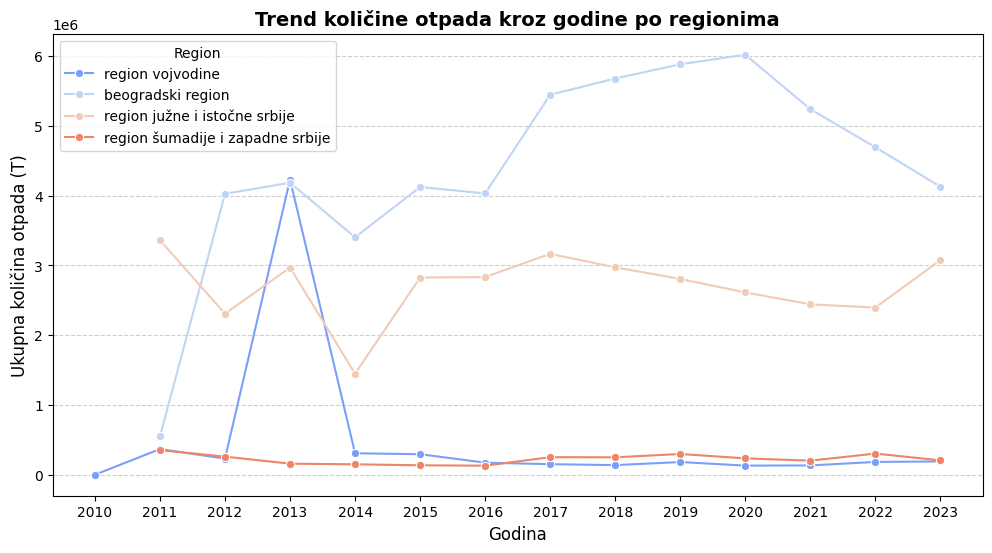

In [40]:
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=df.groupby(["Godina", "Region"])["KolicinaOtpadaT"].sum().reset_index(), 
                  x="Godina", y="KolicinaOtpadaT", hue="Region", marker="o", palette="coolwarm")

# Pode≈°avanje izgleda
plt.title("Trend koliƒçine otpada kroz godine po regionima", fontsize=14, fontweight="bold")
plt.xlabel("Godina", fontsize=12)
plt.ylabel("Ukupna koliƒçina otpada (T)", fontsize=12)
plt.grid(axis='y', linestyle="--", alpha=0.6)

plt.savefig("regioni_trend_otpad.png", dpi=100, bbox_inches="tight")
plt.show()

**Kljuƒçna zapa≈æanja:** 
*Beogradski region* ‚Äì Imao je znaƒçajan rast otpada izmeƒëu 2011 i 2014, zatim postepeni pad. 
*Region Vojvodine* ‚Äì Do≈æiveo o≈°tar skok u 2012 i 2013, a zatim stabilizaciju na ni≈æem nivou. 
*Region ju≈æne i istoƒçne Srbije* ‚Äì Imao je fluktuacije sa vrhuncem oko 2013, nakon ƒçega sledi pad. 
*Region ≈†umadije i zapadne Srbije* ‚Äì Relativno stabilan trend uz blage oscilacije.

**≈†ta je uzrokovalo rast otpada u Beogradskom regionu od 2011 do 2014?**
# Potencijalni faktori: 
1.Ekspanzija termoelektrana ‚Äì Termoelektrane Nikola Tesla (TENT A i B) su meƒëu glavnim generatorima otpada u Obrenovcu. 
2.Rast industrijskih aktivnosti ‚Äì Poveƒáana proizvodnja energije ƒçesto znaƒçi veƒáe koliƒçine leteƒáeg pepela i ≈°ljaƒçnog otpada.
3.Regulatorne promene ‚Äì Da li su u tom periodu uvedeni novi propisi o prijavljivanju industrijskog otpada?
4.Demografski pritisak ‚Äì Rast stanovni≈°tva u Beogradu mo≈æe doprineti veƒáoj proizvodnji komunalnog otpada.

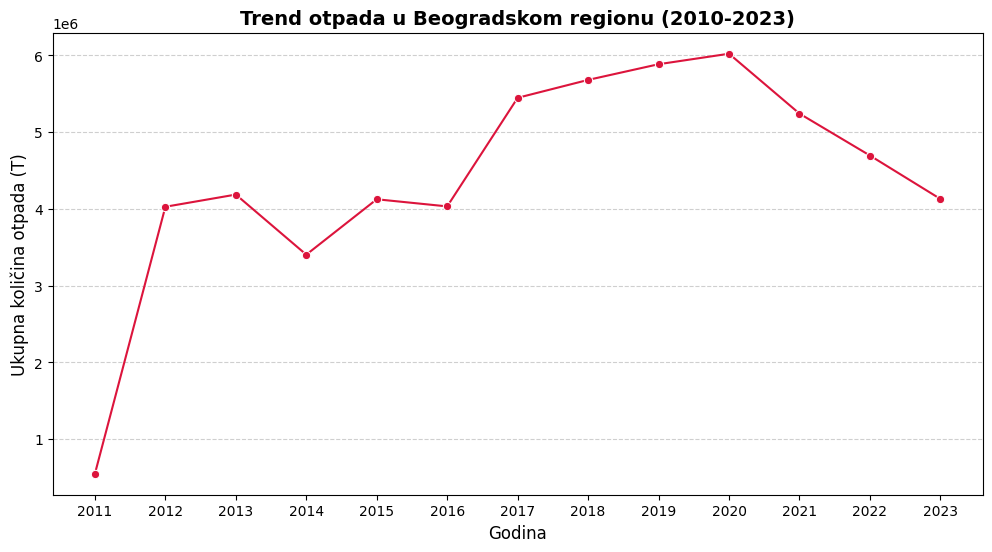

In [41]:
# Vizualizacija otpada u Beogradskom regionu kroz godine
plt.figure(figsize=(12, 6))
beograd_trend = df[df["Region"] == "beogradski region"].groupby("Godina")["KolicinaOtpadaT"].sum()

ax = sns.lineplot(x=beograd_trend.index, y=beograd_trend.values, marker="o", color="crimson")
plt.title("Trend otpada u Beogradskom regionu (2010-2023)", fontsize=14, fontweight="bold")
plt.xlabel("Godina", fontsize=12)
plt.ylabel("Ukupna koliƒçina otpada (T)", fontsize=12)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.savefig("beograd_otpad_trend.png", dpi=100, bbox_inches="tight")
plt.show()

In [42]:
# promena dtype za kolonu df["Godina"] u numeric dtype
df["Godina"] = pd.to_numeric(df["Godina"], errors="coerce")

In [43]:
# pregled podataka za Beogradski region za 2013 godinu
beograd_2013 = df[(df["Region"] == "beogradski region") & (df["Godina"] == 2013)]
print(beograd_2013.head())

       Godina         Okrug             Region            Opstina  \
16740    2013  grad beograd  beogradski region  beograd-√§≈ìukarica   
16741    2013  grad beograd  beogradski region  beograd-√§≈ìukarica   
16742    2013  grad beograd  beogradski region  beograd-√§≈ìukarica   
16743    2013  grad beograd  beogradski region  beograd-lazarevac   
16744    2013  grad beograd  beogradski region  beograd-lazarevac   

                     Mesto SifraMesta  \
16740  beograd (√§≈ìukarica)     791113   
16741                 umka     705195   
16742                 umka     705195   
16743           medo√•¬°evac     704130   
16744           medo√•¬°evac     704130   

                              PreteznaDelatnost        PIB  \
16740    3530 snabdevanje parom i klimatizacija  100139344   
16741         1712 proizvodnja papira i kartona  100003017   
16742         1712 proizvodnja papira i kartona  100003017   
16743  0520 eksploatacija lignita i mrkog uglja  101138490   
16744  0520 eksp

In [44]:
# Filtriranje podataka za Beograd u 2013
beograd_2013 = df[(df["Region"] == "beogradski region") & (df["Godina"] == 2013)]

# Grupisanje po industrijskom sektoru i sortiranje prema koliƒçini otpada
industrije_2013 = beograd_2013.groupby("PreteznaDelatnost")["KolicinaOtpadaT"].sum().sort_values(ascending=False).head(5)

# Prikaz podataka u tabelarnom obliku
print(industrije_2013)

PreteznaDelatnost
3511 proizvodnja elektriƒçne energije                                                4129249.880
0520 eksploatacija lignita i mrkog uglja                                              35688.121
1712 proizvodnja papira i kartona                                                     13263.222
0146 uzgoj svinja                                                                      2500.350
1722 proizvodnja predmeta od papira za li√§¬çnu upotrebu i upotrebu u doma√§‚Ä°instvu       1840.300
Name: KolicinaOtpadaT, dtype: float64


**Komentar:**
1.Energetski sektor (termoelektrane) dominira koliƒçinom otpada. 
2.Rudarstvo i eksploatacija uglja imaju znaƒçajan uticaj. 
3.Papirna industrija takoƒëe doprinosi otpadu, ali u manjoj meri. 
4.Poljoprivreda (uzgoj svinja) pojavljuje se kao dodatni faktor.

Sada ƒáemo analizirati industrijske grane koje su najvi≈°e doprinele generisanju otpada u Beogradu za period 2019-2021.
**Filtriranje podataka za Beograd (2019-2021)**

In [45]:
beograd_2019_2021 = df[(df["Region"] == "beogradski region") & (df["Godina"].between(2019, 2021))]

# Grupisanje industrija po ukupnoj koliƒçini otpada
industrije_2019_2021 = beograd_2019_2021.groupby("PreteznaDelatnost")["KolicinaOtpadaT"].sum().sort_values(ascending=False).head(5)

# Prikaz podataka u tabelarnom obliku
print(industrije_2019_2021)

PreteznaDelatnost
3514 trgovina elektriƒçnom energijom             1.695322e+07
1712 proizvodnja papira i kartona               9.238941e+04
3832 ponovna upotreba razvrstanih materijala    2.705217e+04
1051 prerada mleka i proizvodnja sireva         2.114364e+04
2452 livenje √§¬çelika                            1.939211e+04
Name: KolicinaOtpadaT, dtype: float64


**Sliƒçnosti izmeƒëu 2013 i 2019-2021**
1.Papirna industrija ostaje znaƒçajan faktor ‚Üí "1712 proizvodnja papira i kartona" je prisutna u oba perioda. 
2.Energetski sektor dominira ‚Üí 2013. godine dominirala je "3511 proizvodnja elektriƒçne energije", dok je u 2019-2021 preuzela "3514 trgovina elektriƒçnom energijom". To ukazuje na kontinuitet u velikim koliƒçinama otpada iz energetskih sektora. 
3.Preraƒëivaƒçke industrije ‚Üí I u 2013. i u 2019-2021 postoje sektori koji ukljuƒçuju preradu sirovina, poput "livenje ƒçelika" u 2019-2021.

**Kljuƒçne razlike izmeƒëu 2013 i 2019-2021**
- Eksploatacija lignita i uglja opala ‚Üí "0520 eksploatacija lignita i mrkog uglja" bila je meƒëu vodeƒáim u 2013, ali u 2019-2021 je nestala iz top 5. 
- Nova industrijska aktivnost ‚Äì prerada mleka i proizvodnja sireva ‚Üí "1051 prerada mleka i proizvodnja sireva" pojavljuje se tek u 2019-2021. To mo≈æe ukazivati na rast prehrambene industrije u tom periodu. 
- Pojavljuje se ponovna upotreba materijala ‚Üí "3832 ponovna upotreba razvrstanih materijala" je novi sektor u 2019-2021, ≈°to mo≈æe ukazivati na veƒái fokus na recikla≈æu i odr≈æivu proizvodnju.

**Zakljuƒçak** 
 - Energetski sektor ostaje dominantan, ali se njegov profil menja. 
 - Papirna industrija ostaje znaƒçajan faktor, ali se pojavljuju novi sektori prerade. 
 - Ekolo≈°ki trendovi i odr≈æivost dobijaju na znaƒçaju, ≈°to mo≈æemo videti kroz rast recikla≈æe i prerade materijala.

# Moguƒái uzroci promena u industrijskim sektorima generisanja otpada u Beogradu izmeƒëu 2013 i 2019-2021.

**Ekonomski faktori**
 
# Rast trgovine elektriƒçnom energijom (3514)

2019-2021 period bele≈æi znaƒçajan porast trgovine elektriƒçnom energijom, dok je 2013. dominirala proizvodnja (3511).Ovaj pomak mo≈æe biti rezultat liberalizacije tr≈æi≈°ta elektriƒçne energije u Srbiji, gde je veƒái fokus na distribuciji i trgovini nego na direktnoj proizvodnji.

# Opadanje eksploatacije lignita i mrkog uglja (0520)

Eksploatacija uglja bila znaƒçajan generator otpada, dok u 2019-2021 vi≈°e nije u vrhu.Moguƒái razlozi: pad potra≈ænje za lignitom zbog ekolo≈°kih pritisaka i EU regulativa, prelazak na alternativne izvore energije, ukljuƒçujuƒái gas i obnovljive izvore.

**Regulatorni zahtevi i ekolo≈°ki pritisci**

# Pojava recikla≈æe i ponovne upotrebe materijala (3832)

2019-2021 vidimo sna≈æan rast recikla≈æe i ponovne upotrebe otpada, ≈°to nije bio znaƒçajan sektor u 2013. Ovaj trend je povezan sa: zakonom o upravljanju otpadom koji postavlja stro≈æe zahteve za recikla≈æu u Srbiji, EU pristupni proces, koji zahteva modernizaciju ekolo≈°kih standarda.

# Rast prehrambene industrije (1051)

Industrija prerade mleka i proizvodnje sireva ulazi meƒëu vodeƒáe u generisanju otpada u 2019-2021. Ovo mo≈æe biti posledica rasta potro≈°nje mleƒçnih proizvoda, ekspanzije lokalne proizvodnje ili promena u prehrambenim navikama potro≈°aƒça.

**Tehnolo≈°ke promene**

# Modernizacija papirne industrije (1712)

Papirna industrija je prisutna i u 2013. i 2019-2021, ali struktura otpada mo≈æe se menjati.Novi procesi u preradi papira mogu smanjiti neefikasnost u kori≈°ƒáenju sirovina, ali i generisati novi tip otpada.

# Livenje ƒçelika (2452) ulazi u top sektore

Ovaj sektor se pojavljuje tek u 2019-2021, ≈°to mo≈æe ukazivati na rast metalopreraƒëivaƒçke industrije u Srbiji.

**Zakljuƒçak** 
*Energetski sektor se transformi≈°e* ‚Äì eksploatacija uglja opada, dok trgovina elektriƒçnom energijom raste. 
*Ekolo≈°ki zahtevi utiƒçu na industrije* ‚Äì recikla≈æa i ponovna upotreba materijala postaju znaƒçajni. 
*Prehrambena industrija bele≈æi rast* ‚Äì mleƒçni proizvodi postaju deo otpada u 2019-2021. 
*Tehnolo≈°ke inovacije menjaju profil otpada* ‚Äì preraƒëivaƒçka industrija i metalurgija imaju novi uticaj.

**Za≈°to je Vojvodina imala nagli skok u 2012/2013, a zatim pad?**

*Moguƒái uzroci:* rast industrijskih kapaciteta ‚Äì metalurgija i rudarstvo su kljuƒçni sektori u Vojvodini, reorganizacija ekolo≈°ke regulative ‚Äì moguƒáe je da su neka postrojenja poƒçela prijavljivati veƒáe koliƒçine otpada, veƒái uvoz sirovina ‚Äì poveƒáana eksploatacija gvo≈æƒëa, ƒçelika i ruda mo≈æe poveƒáati koliƒçinu industrijskog otpada, pad nakon 2013 ‚Äì da li je do≈°lo do zatvaranja industrijskih postrojenja ili prelaska na ƒçistije tehnologije?

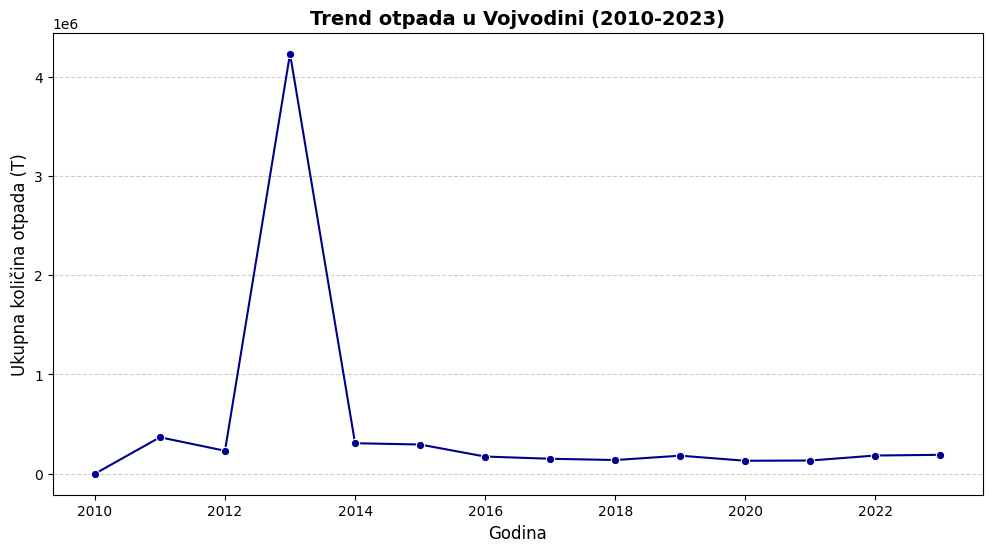

In [46]:
# Vizualizacija otpada u Vojvodini kroz godine
plt.figure(figsize=(12, 6))
vojvodina_trend = df[df["Region"] == "region vojvodine"].groupby("Godina")["KolicinaOtpadaT"].sum()

ax = sns.lineplot(x=vojvodina_trend.index, y=vojvodina_trend.values, marker="o", color="darkblue")
plt.title("Trend otpada u Vojvodini (2010-2023)", fontsize=14, fontweight="bold")
plt.xlabel("Godina", fontsize=12)
plt.ylabel("Ukupna koliƒçina otpada (T)", fontsize=12)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.savefig("vojvodina_otpad_trend.png", dpi=100, bbox_inches="tight")
plt.show()

# Koje industrije su bile kljuƒçni faktori u generisanju otpada u Vojvodini u 2012 i 2013.
Generisanje podataka za Top 5 industrijskih sektora u Vojvodini (2012 & 2013)

In [47]:
# Filtriranje podataka za Vojvodinu u 2012 i 2013
vojvodina_2012_2013 = df[(df["Region"] == "region vojvodine") & (df["Godina"].between(2012, 2013))]

# Grupisanje industrija po ukupnoj koliƒçini otpada
industrije_2012_2013 = vojvodina_2012_2013.groupby("PreteznaDelatnost")["KolicinaOtpadaT"].sum().sort_values(ascending=False).head(5)

# Prikaz podataka u tabelarnom obliku
print(industrije_2012_2013)

PreteznaDelatnost
0111 gajenje ≈æita (osim pirinƒça), leguminoza i uljarica               4015650.737
1105 proizvodnja piva                                                  100720.441
2410 proizvodnja sirovog gvo≈æƒëa, ƒçelika i ferolegura                    99897.260
1081 proizvodnja √•¬°e√§‚Ä°era                                               84573.837
2932 proizvodnja ostalih delova i dodatne opreme za motorna vozila      29686.288
Name: KolicinaOtpadaT, dtype: float64


**Kljuƒçni faktori rasta otpada u 2012-2013**

# Poljoprivreda ‚Äì gajenje ≈æita, leguminoza i uljarica (4015650 T)

Ogromna koliƒçina otpada dolazi iz agroindustrije, ≈°to mo≈æe biti povezano sa intenzivnijom proizvodnjom i promenama u agrarnim politikama. Ovo mo≈æe ukazivati na eksploataciju zemlji≈°ta, veƒáe kori≈°ƒáenje hemikalija, ili uvoƒëenje novih metoda uzgoja.

# Prehrambena industrija ‚Äì proizvodnja piva i ≈°eƒáera

Pivarska industrija (100720 T) i proizvodnja ≈°eƒáera (84573 T) znaƒçajno doprinose otpadu.Moguƒáe je da je u tom periodu do≈°lo do rasta potro≈°nje piva i ≈°eƒáera, ≈°to bi poveƒáalo industrijski otpad.

# Metalurgija ‚Äì proizvodnja sirovog gvo≈æƒëa, ƒçelika i ferolegura (99897 T)

Ovaj sektor je tradicionalno jedan od najveƒáih generatora otpada.Naglo poveƒáanje proizvodnje metala u 2012 mo≈æe ukazivati na veƒái izvoz, infrastrukturne projekte ili industrijski rast.

# Automobilska industrija ‚Äì proizvodnja delova za motorna vozila (2932)

Ovo mo≈æe biti povezano sa investicijama u proizvodne pogone ili poveƒáanom potra≈ænjom za auto-delovima.

**Za≈°to je otpada naglo opao nakon 2013?**

# Ekolo≈°ke regulative i stro≈æija kontrola otpada

Moguƒáe je da su fabrike poƒçele prijavljivati manje koliƒçine otpada ili uvesti efikasnije metode upravljanja otpadom.

# Zatvaranje postrojenja ili smanjenje kapaciteta

Ako su fabrike metala ili prehrambeni pogoni pre≈°li na ekolo≈°kije tehnologije, generisanje otpada je moglo znaƒçajno opasti.

# Tr≈æi≈°ne promene ‚Äì smanjenje proizvodnje ≈æitarica ili ≈°eƒáera

Poljoprivredni sektor je imao najveƒái doprinos otpadu u 2012, pa je moguƒáe da su promene u subvencijama ili tr≈æi≈°tu dovele do smanjenja proizvodnje nakon 2013.

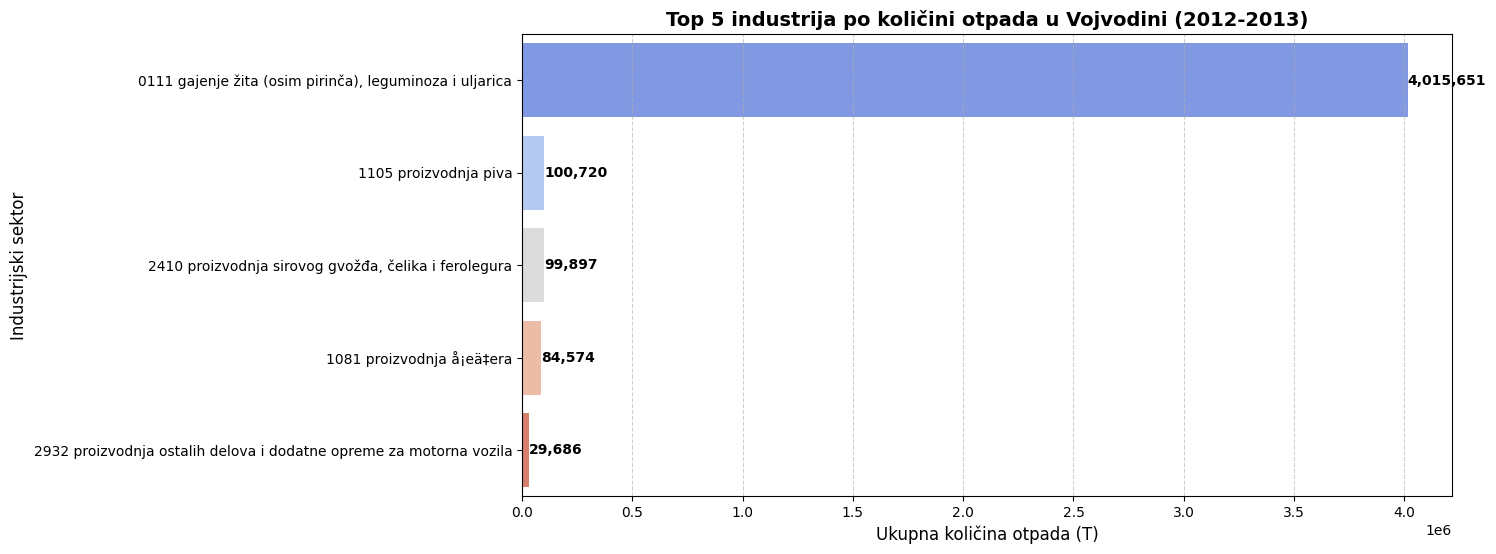

In [48]:
# Bar dijagram za industrije koje su generisale najvi≈°e otpada (2012-2013)

# Filtriranje podataka za Vojvodinu u 2012 i 2013
vojvodina_2012_2013 = df[(df["Region"] == "region vojvodine") & (df["Godina"].between(2012, 2013))]

# Grupisanje industrija po ukupnoj koliƒçini otpada
industrije_2012_2013 = vojvodina_2012_2013.groupby("PreteznaDelatnost")["KolicinaOtpadaT"].sum().sort_values(ascending=False).head(5)

# Kreiranje bar dijagrama
plt.figure(figsize=(12, 6))
ax = sns.barplot(y=industrije_2012_2013.index, x=industrije_2012_2013.values, hue=industrije_2012_2013.index, palette="coolwarm", legend=False)

# Dodavanje anotacija na stubce
for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', fontsize=10, fontweight='bold', color='black')

# Pode≈°avanje izgleda
plt.title("Top 5 industrija po koliƒçini otpada u Vojvodini (2012-2013)", fontsize=14, fontweight="bold")
plt.xlabel("Ukupna koliƒçina otpada (T)", fontsize=12)
plt.ylabel("Industrijski sektor", fontsize=12)
plt.grid(axis='x', linestyle="--", alpha=0.6)

# ƒåuvanje i prikaz dijagrama
plt.savefig("vojvodina_industrije_2012_2013.png", dpi=100, bbox_inches="tight")
plt.show()

**Geografska analiza otpada (2010-2023)**
Sada ƒáemo istra≈æiti kojim mestima na nivou cele Srbije pripada najveƒáa koliƒçina otpada ‚Äì da li su industrijski centri glavni generatori ili postoje neoƒçekivane oblasti sa velikim koliƒçinama otpada?
Kod za analizu geografskog rasporeda otpada

In [50]:
# Korekcija naziva mesta zbog ƒáiriliƒçnih slova
df["Mesto"] = df["Mesto"].replace({"u√•¬°√§‚Ä°e":"u≈°ƒáe"})

In [52]:
# Grupisanje otpada po mestima za ceo period 2010-2023
geografska_analiza = df.groupby("Mesto")["KolicinaOtpadaT"].sum().sort_values(ascending=False).head(10)

# Kreiranje tabele
tabela = pd.DataFrame({
    "Mesto": geografska_analiza.index,
    "Ukupna koliƒçina otpada (T)": geografska_analiza.values
})

# Prikaz podataka u tabelarnom obliku
print(tabela)

            Mesto  Ukupna koliƒçina otpada (T)
0       obrenovac                2.988341e+07
1            u≈°ƒáe                2.331556e+07
2   selo kostolac                1.345986e+07
3        kostolac                9.287656e+06
4         radinac                5.583013e+06
5         temerin                4.044351e+06
6  veliki crljeni                3.184799e+06
7       smederevo                2.799870e+06
8      kriva feja                1.738250e+06
9       svilajnac                1.518250e+06


In [53]:
# Grupisanje otpada po mestima za ceo period 2010-2023
geografska_analiza = df.groupby("Mesto")["KolicinaOtpadaT"].sum().sort_values(ascending=False).head(10)

# Kreiranje bar dijagrama
plt.figure(figsize=(12, 6))
ax = sns.barplot(y=geografska_analiza.index, x=geografska_analiza.values, hue=geografska_analiza.index, palette="coolwarm", legend=False)

# Dodavanje anotacija na stubce
for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}',  # Formatirano u ceo broj sa zarezima
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', fontsize=10, fontweight='bold', color='black')

# Pode≈°avanje izgleda
plt.title("Top 10 mesta po koliƒçini otpada (2010-2023)", fontsize=14, fontweight="bold")
plt.xlabel("Ukupna koliƒçina otpada (T)", fontsize=12)
plt.ylabel("Mesto")
plt.grid(axis='x', linestyle="--", alpha=0.6)

# ƒåuvanje i prikaz dijagrama
plt.savefig("geografska_otpada_2010_2023.png", dpi=100, bbox_inches="tight")
plt.show()

**Kljuƒçne analize**
1.Industrijski centri dominiraju ‚Üí Obrenovac, Kostolac i Smederevo su poznati po termoelektranama, metalur≈°kim postrojenjima i velikoj industrijskoj aktivnosti. 
2.Energetski sektor igra kljuƒçnu ulogu ‚Üí Kostolac i Veliki Crljeni su blizu termoelektrana, pa visok nivo otpada mo≈æe biti posledica eksploatacije resursa i industrijske obrade. 
3.Poljoprivredno-industrijska mesta u igri ‚Üí Temerin i Svilajnac nisu klasiƒçni industrijski centri, ali mogu imati veliku agroindustrijsku aktivnost, ukljuƒçujuƒái preradu poljoprivrednih proizvoda.

**Industrijski otpad u Srbiji (2010-2023): Priƒça o ekolo≈°kim promenama**

Industrijski razvoj Srbije tokom poslednje decenije bio je neizostavno povezan sa pitanjem generisanog otpada i njegovim uticajem na ≈æivotnu sredinu. Kroz sveobuhvatnu analizu podataka, otkrili smo trendove, kljuƒçne sektore, regionalne razlike i ekolo≈°ke izazove koje industrijski otpad postavlja pred dru≈°tvo.

# Kako je Srbija generisala otpad?
Podaci nam govore priƒçu o dominaciji energetskog sektora, dok se postepeno pojavljuju znaci ekolo≈°ke tranzicije i prelaska na odr≈æivije prakse. Beogradski region je bio najveƒái generator otpada (57,4M tona), dok je Ju≈æna i Istoƒçna Srbija zauzela drugo mesto sa 35,2M tona. Meƒëutim, ovaj otpad nije uniformno rasporeƒëen ‚Äì termoelektrane, rudarstvo i metalurgija bili su najveƒái izvori zagaƒëenja.Vojvodina je zabele≈æila nagli skok otpada u 2012-2013, usled ekspanzije poljoprivrede, metalurgije i prehrambene industrije. Taj trend se prekinuo nakon 2013, verovatno pod uticajem ekolo≈°kih regulativa, zatvaranja industrijskih postrojenja ili prelaska na ekolo≈°ke tehnologije.

# Industrijski sektori: Ko generi≈°e otpad?
Energetski sektor dominira ‚Äì trgovina elektriƒçnom energijom (62,1M tona otpada) i proizvodnja elektriƒçne energije (18,7M tona) ƒçine najveƒáe izvore otpada. U tom kontekstu, Termoelektrane Nikola Tesla (TENT A i B) ostaju kljuƒçni faktori, sa ogromnim koliƒçinama leteƒáeg pepela od uglja (77,2M tona). Metalurgija i rudarstvo su generisali 8,8M tona otpada, ≈°to ukazuje na kontinuiranu eksploataciju gvo≈æƒëa, ƒçelika i ferolegura. Zanimljivo, poljoprivreda i prehrambena industrija su takoƒëe igrale znaƒçajnu ulogu ‚Äì uzgoj ≈æitarica (4,5M tona), proizvodnja piva, ≈°eƒáera i mleƒçnih proizvoda pokazuje da agroindustrija nije zanemarljiv ekolo≈°ki faktor. S druge strane, recikla≈æni sektor raste ‚Äì ponovna upotreba razvrstanih materijala (27,052 tona otpada) signalizira tranziciju ka odr≈æivijem upravljanju industrijskim otpadom.

# Kako se otpad menjao kroz godine?
2013 godina je bila najkritiƒçnija, sa rekordnih 11,5M tona otpada. Nakon toga, poƒçinje pad koliƒçine otpada, koji mo≈æe biti povezan sa regulatornim promenama, manjim industrijskim kapacitetima i rastom ekolo≈°ke svesti.Od 2019-2021, bele≈æimo pad eksploatacije lignita i uglja, dok recikla≈æa i ponovna upotreba materijala bele≈æe rast. Prehrambena industrija, koja ranije nije bila znaƒçajan faktor u otpadu, poƒçinje da zauzima sve veƒái prostor.

# Kako otpad utiƒçe na ≈æivotnu sredinu?
Leteƒái pepeo od uglja ‚Äì najdominantniji oblik otpada ‚Äì mo≈æe zagaƒëivati vodene tokove, zemlji≈°te i atmosferu, dok zagaƒëenje metalima iz rudarstva ugro≈æava biolo≈°ku raznovrsnost i zdravlje ljudi. Poljoprivreda doprinosi zagaƒëenju voda, usled nepravilnog odlaganja otpada bogatog azotom i fosforom, ≈°to dovodi do eutrofikacije i uni≈°tavanja ekosistema. Sa druge strane, porast recikla≈æe i odr≈æive proizvodnje je pozitivan ekolo≈°ki pomak, smanjujuƒái potrebu za eksploatacijom sirovina i otvarajuƒái put ka cirkularnoj ekonomiji.

**≈†ta mo≈æemo zakljuƒçiti?**
1.Industrijski sektor dominira generisanjem otpada, ali regulative menjaju njegov profil.
2.Ekolo≈°ke politike i tr≈æi≈°ne promene su uticale na pad otpada u Vojvodini nakon 2013.
3.Recikla≈æa i odr≈æiva proizvodnja postaju sve znaƒçajniji faktori od 2019-2021.
4.Energetski sektor prolazi kroz transformaciju ‚Äì eksploatacija uglja opada, dok trgovina elektriƒçnom energijom raste.
5.Najveƒái ekolo≈°ki izazov ostaje termoelektranski pepeo, dok tranzicija ka obnovljivim izvorima energije mo≈æe umanjiti njegov uticaj.